In [1]:
import pandas as pd

data was uploaded from https://github.com/CSSEGISandData/COVID-19

In [2]:
url_case = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# df = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col=1)
df = pd.read_csv(url_case, index_col=1)

In [3]:
# df.head()

In [4]:
list_ = [i for i in range(0, 15)] # 0 cases list

df_1 = df.drop(['Lat', 'Long','Province/State'], axis=1)
df_1 = df_1.drop(df_1.columns[list_], axis='columns')
# df_1

In [5]:
df_1 = df_1[(df_1.index == 'US') \
            | (df_1.index == 'Russia') | (df_1.index == 'Italy')\
            | (df_1.index == 'Germany') | (df_1.index == 'Spain')\
            | (df_1.index == 'Switzerland') | (df_1.index == 'Sweden')\
            | (df_1.index == 'Norway') | (df_1.index == 'Poland')\
            | (df_1.index == 'Ukraine') | (df_1.index == 'Estonia')]


df_c_avg = df_1.copy()
df_1

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0,0,0,0,0,0,0,0,0,0,...,1108,1149,1185,1207,1258,1304,1309,1332,1373,1400
Germany,12,13,13,14,14,16,16,16,16,16,...,103374,107663,113296,118181,122171,124908,127854,130072,131359,134753
Italy,2,3,3,3,3,3,3,3,3,3,...,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155
Norway,0,0,0,0,0,0,0,0,0,0,...,5865,6086,6086,6211,6314,6409,6525,6603,6623,6740
Poland,0,0,0,0,0,0,0,0,0,0,...,4413,4848,5205,5575,5955,6356,6674,6934,7202,7582
Russia,2,2,2,2,2,2,2,2,2,2,...,6343,7497,8672,10131,11917,13584,15770,18328,21102,24490
Spain,1,1,1,2,2,2,2,2,2,2,...,136675,141942,148220,153222,158273,163027,166831,170099,172541,177644
Sweden,1,1,1,1,1,1,1,1,1,1,...,7206,7693,8419,9141,9685,10151,10483,10948,11445,11927
Switzerland,0,0,0,0,0,0,0,0,0,0,...,21657,22253,23280,24051,24551,25107,25415,25688,25936,26336


In [6]:
df_2 = df_1.dropna().T
df_2['Russia'].plot(c='r', figsize=(15, 10), title='cases',legend="Russia",)
df_2['US'].plot(c='g', legend="US")
df_2['Spain'].plot(c='orange', legend='Spain')
df_2['Germany'].plot(c='k',legend="Germany")
df_2['Italy'].plot(c='b', legend="It", ).grid()


In [7]:
df_pop = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')
df_pop = df_pop.drop(['UID', 'iso2','iso3','code3','FIPS',\
                      'Admin2','Lat','Long_', 'Province_State','Combined_Key'], axis=1)


In [8]:
# df_pop.shape

In [9]:
# df_pop.head()

In [10]:
df_pop = df_pop.drop(df_pop.index[267:3574]) # reduce number of US's cells
df_pop = df_pop[(df_pop['Country_Region'] == 'US') | (df_pop['Country_Region'] == 'Russia') \
                | (df_pop['Country_Region'] == 'Italy') | (df_pop['Country_Region'] == 'Spain') \
                | (df_pop['Country_Region'] == 'Germany') | (df_pop['Country_Region'] == 'Switzerland')\
                | (df_pop['Country_Region'] == 'Sweden') | (df_pop['Country_Region'] == 'Norway')\
                | (df_pop['Country_Region'] == 'Poland') | (df_pop['Country_Region'] == 'Ukraine')\
                | (df_pop['Country_Region'] == 'Estonia')]
# df_pop


In [11]:
df_pop.rename(columns={'Country_Region' : 'Country/Region'}, inplace=True)
df_pop

,Country/Region,Population
53,Estonia,1326539.0
62,Germany,83783945.0
81,Italy,60461828.0
123,Norway,5421242.0
131,Poland,37846605.0
135,Russia,145934460.0
153,Spain,46754783.0
157,Sweden,10099270.0
158,Switzerland,8654618.0
169,Ukraine,43733759.0


In [12]:
df_pop.set_index('Country/Region', inplace=True)
# df_pop, df_pop.shape

In [13]:
df_per_capita = df_1.copy()
df_per_capita

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0,0,0,0,0,0,0,0,0,0,...,1108,1149,1185,1207,1258,1304,1309,1332,1373,1400
Germany,12,13,13,14,14,16,16,16,16,16,...,103374,107663,113296,118181,122171,124908,127854,130072,131359,134753
Italy,2,3,3,3,3,3,3,3,3,3,...,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155
Norway,0,0,0,0,0,0,0,0,0,0,...,5865,6086,6086,6211,6314,6409,6525,6603,6623,6740
Poland,0,0,0,0,0,0,0,0,0,0,...,4413,4848,5205,5575,5955,6356,6674,6934,7202,7582
Russia,2,2,2,2,2,2,2,2,2,2,...,6343,7497,8672,10131,11917,13584,15770,18328,21102,24490
Spain,1,1,1,2,2,2,2,2,2,2,...,136675,141942,148220,153222,158273,163027,166831,170099,172541,177644
Sweden,1,1,1,1,1,1,1,1,1,1,...,7206,7693,8419,9141,9685,10151,10483,10948,11445,11927
Switzerland,0,0,0,0,0,0,0,0,0,0,...,21657,22253,23280,24051,24551,25107,25415,25688,25936,26336


In [14]:
df_per_capita[0:1] = df_1[0:1].div(df_pop.iloc[0][0])
df_per_capita[1:2] = df_1[1:2].div(df_pop.iloc[1][0])
df_per_capita[2:3] = df_1[2:3].div(df_pop.iloc[2][0])
df_per_capita[3:4] = df_1[3:4].div(df_pop.iloc[3][0])
df_per_capita[4:5] = df_1[4:5].div(df_pop.iloc[4][0])

df_per_capita[5:6] = df_1[5:6].div(df_pop.iloc[5][0])
df_per_capita[6:7] = df_1[6:7].div(df_pop.iloc[6][0])
df_per_capita[7:8] = df_1[7:8].div(df_pop.iloc[7][0])
df_per_capita[8:9] = df_1[8:9].div(df_pop.iloc[8][0])
df_per_capita[9:10] = df_1[9:10].div(df_pop.iloc[9][0])
df_per_capita[10:11] = df_1[10:11].div(df_pop.iloc[10][0])

In [15]:
df_per_capita

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000835,0.000866,0.000893,0.000910,0.000948,0.000983,0.000987,0.001004,0.001035,0.001055
Germany,1.432255e-07,1.551610e-07,1.551610e-07,1.670965e-07,1.670965e-07,1.909674e-07,1.909674e-07,1.909674e-07,1.909674e-07,1.909674e-07,...,0.001234,0.001285,0.001352,0.001411,0.001458,0.001491,0.001526,0.001552,0.001568,0.001608
Italy,3.307872e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,...,0.002192,0.002243,0.002306,0.002375,0.002441,0.002518,0.002586,0.002638,0.002687,0.002732
Norway,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.001082,0.001123,0.001123,0.001146,0.001165,0.001182,0.001204,0.001218,0.001222,0.001243
Poland,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000117,0.000128,0.000138,0.000147,0.000157,0.000168,0.000176,0.000183,0.000190,0.000200
Russia,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,...,0.000043,0.000051,0.000059,0.000069,0.000082,0.000093,0.000108,0.000126,0.000145,0.000168
Spain,2.138819e-08,2.138819e-08,2.138819e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,...,0.002923,0.003036,0.003170,0.003277,0.003385,0.003487,0.003568,0.003638,0.003690,0.003799
Sweden,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,...,0.000714,0.000762,0.000834,0.000905,0.000959,0.001005,0.001038,0.001084,0.001133,0.001181
Switzerland,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.002502,0.002571,0.002690,0.002779,0.002837,0.002901,0.002937,0.002968,0.002997,0.003043


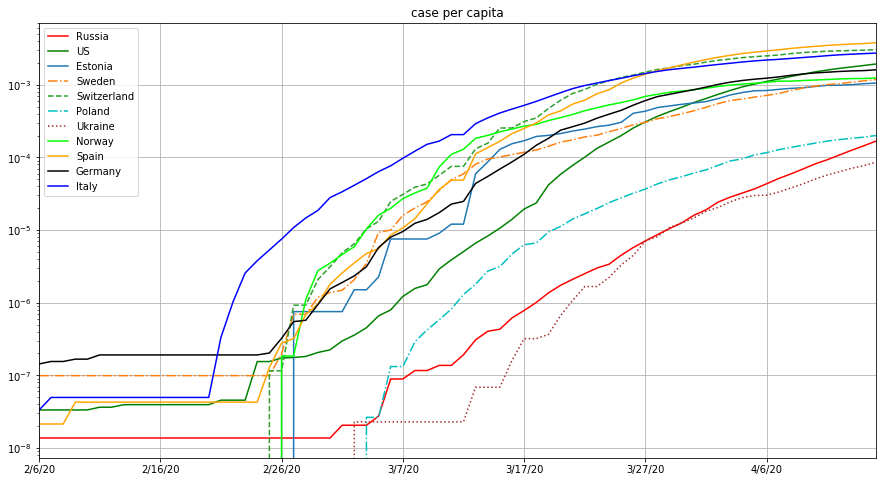

In [16]:
df_4_ = df_per_capita.T
df_4_['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='case per capita')
df_4_['US'].plot(c='g', legend="US", linestyle='solid')
df_4_['Estonia'].plot(legend="Est")
df_4_['Sweden'].plot(legend="Sw", linestyle='-.')
df_4_['Switzerland'].plot(legend="S", linestyle='--')
df_4_['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_4_['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_4_['Norway'].plot(c='lime',legend="Nor")
df_4_['Spain'].plot(c='orange',legend="Spain", )
df_4_['Germany'].plot(c='k',legend="Germany", )
df_4_['Italy'].plot(c='b', legend="It", logy=True).grid()

In [17]:
url_death = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
# df_death = pd.read_csv('time_series_covid19_deaths_global.csv', index_col=1)
df_death = pd.read_csv(url_death, index_col=1)
df_death.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,11,14,14,15,15,18,18,21,23,25
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,21,22,22,23,23,23,23,23,24,25
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,173,193,205,235,256,275,293,313,326,336
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,21,22,23,25,26,26,29,29,31,33
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [18]:
df_death = df_death.drop(['Lat', 'Long','Province/State'], axis=1)

df_death = df_death.drop(df_death.columns[list_], axis='columns')
# df_death

In [19]:
df_death = df_death[(df_death.index == 'US') \
                    | (df_death.index == 'Russia') | (df_death.index == 'Italy')\
                    | (df_death.index == 'Spain') | (df_death.index == 'Germany')
                    | (df_death.index == 'Sweden') | (df_death.index == 'Poland')\
                    | (df_death.index == 'Estonia') | (df_death.index == 'Norway')
                    | (df_death.index == 'Ukraine') | (df_death.index == 'Switzerland')]

df_death

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0,0,0,0,0,0,0,0,0,0,...,19,21,24,24,24,24,25,28,31,35
Germany,0,0,0,0,0,0,0,0,0,0,...,1810,2016,2349,2607,2767,2736,3022,3194,3294,3804
Italy,0,0,0,0,0,0,0,0,0,0,...,16523,17127,17669,18279,18849,19468,19899,20465,21067,21645
Norway,0,0,0,0,0,0,0,0,0,0,...,76,89,101,108,113,119,128,134,139,150
Poland,0,0,0,0,0,0,0,0,0,0,...,107,129,159,174,181,208,232,245,263,286
Russia,0,0,0,0,0,0,0,0,0,0,...,47,58,63,76,94,106,130,148,170,198
Spain,0,0,0,0,0,0,0,0,0,0,...,13341,14045,14792,15447,16081,16606,17209,17756,18056,18708
Sweden,0,0,0,0,0,0,0,0,0,0,...,477,591,687,793,870,887,899,919,1033,1203
Switzerland,0,0,0,0,0,0,0,0,0,0,...,765,821,895,948,1002,1036,1106,1138,1174,1239


In [20]:
df_death_to_case = df_death / df_1
df_death_to_case = df_death_to_case.fillna(0)

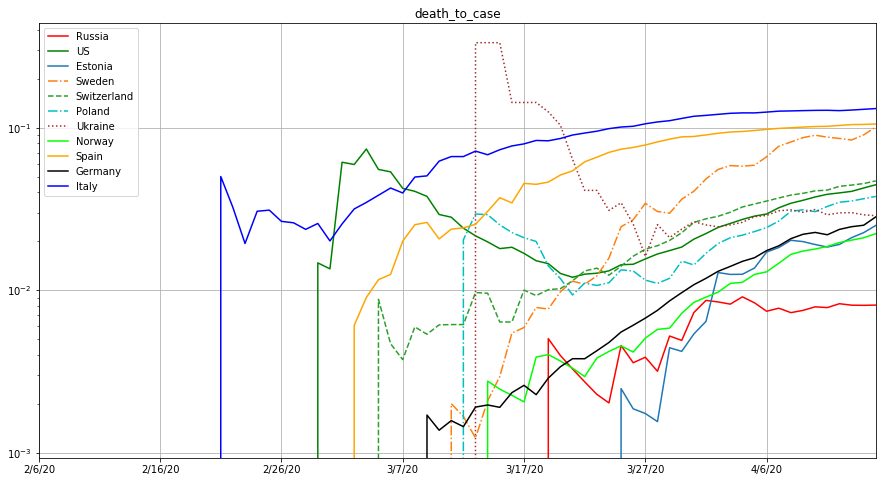

In [21]:
df_5 = df_death_to_case.T
df_5['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death_to_case',)
df_5['US'].plot(c='g',legend="US",)
df_5['Estonia'].plot(legend="Est")
df_5['Sweden'].plot(legend="Sw", linestyle='-.')
df_5['Switzerland'].plot(legend="S", linestyle='--')
df_5['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_5['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_5['Norway'].plot(c='lime',legend="Nor")
df_5['Spain'].plot(c='orange',legend="Spain", )
df_5['Germany'].plot(c='k',legend="Germany", )
df_5['Italy'].plot(c='b', legend="It", logy=True).grid()


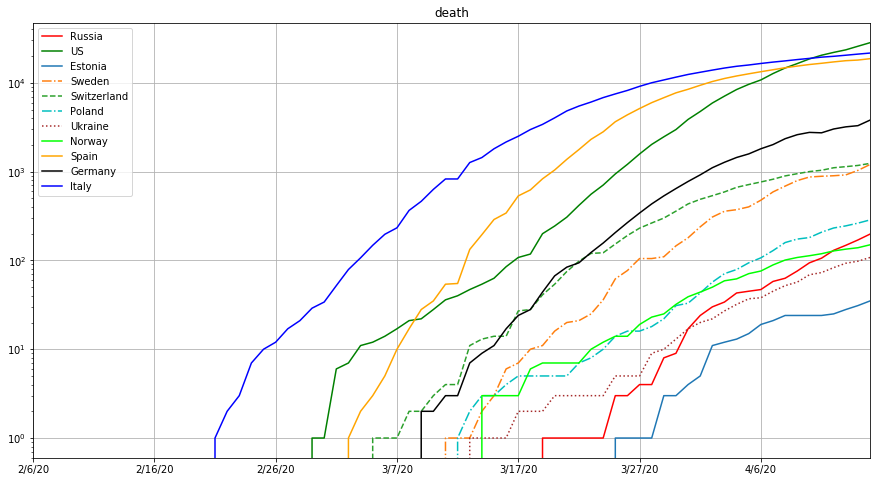

In [22]:
df_6 = df_death.T
df_6['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death', logy=True)
df_6['US'].plot(c='g', legend="US", )
df_6['Estonia'].plot(legend="Est")
df_6['Sweden'].plot(legend="Sw",linestyle='-.' )
df_6['Switzerland'].plot(legend="S", linestyle='--')
df_6['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_6['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_6['Norway'].plot(c='lime',legend="Nor")
df_6['Spain'].plot(c='orange',legend="Spain")
df_6['Germany'].plot(c='k',legend="Germany")
df_6['Italy'].plot(c='b', legend="It").grid()

In [23]:
# df['gdp'] = df['gdp'].shift(-1)
# df_per_capita
# df_death_to_case
# df_death

df_death_to_case = df_death_to_case.drop(df_death_to_case.columns[[i for i in range(0, 14)]], axis='columns')
# df_death_to_case

In [24]:
df_death_to_case.iloc[0] = df_death_to_case.iloc[0].shift(-33)
df_death_to_case.iloc[1] = df_death_to_case.iloc[1].shift(-17)
df_death_to_case.iloc[3] = df_death_to_case.iloc[3].shift(-22)
df_death_to_case.iloc[4] = df_death_to_case.iloc[4].shift(-20)
df_death_to_case.iloc[5] = df_death_to_case.iloc[5].shift(-27)
df_death_to_case.iloc[6] = df_death_to_case.iloc[6].shift(-11)
df_death_to_case.iloc[7] = df_death_to_case.iloc[7].shift(-19)
df_death_to_case.iloc[8] = df_death_to_case.iloc[8].shift(-13)
df_death_to_case.iloc[9] = df_death_to_case.iloc[9].shift(-21)
df_death_to_case.iloc[-1] = df_death_to_case.iloc[-1].shift(-8)

avg = df_death_to_case.T.mean(numeric_only=True, axis=1)


df_death_to_case_T = df_death_to_case.T
df_death_to_case_T['Avg'] = avg
df_death_to_case = df_death_to_case_T.T

# df_death_to_case
avg_d_t_c = avg.copy()


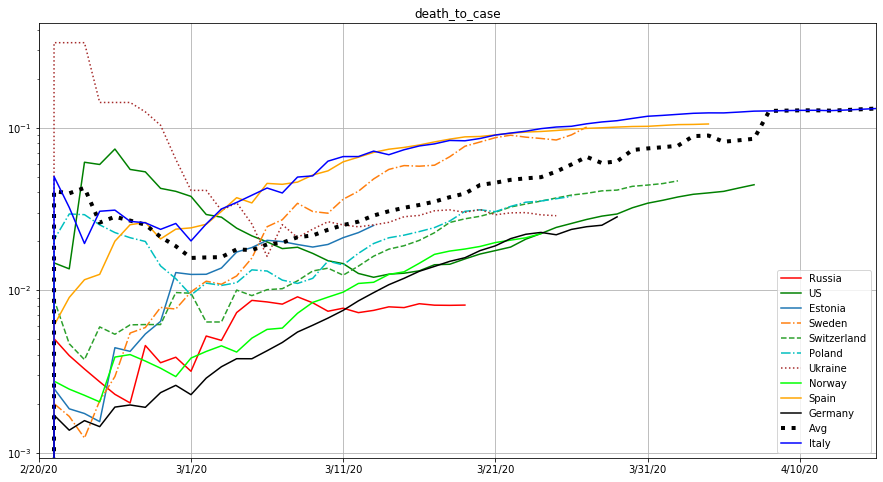

In [25]:
df_5 = df_death_to_case.T
df_5['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death_to_case',)
df_5['US'].plot(c='g',legend="US",)
df_5['Estonia'].plot(legend="Est")
df_5['Sweden'].plot(legend="Sw", linestyle='-.')
df_5['Switzerland'].plot(legend="S", linestyle='--')
df_5['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_5['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_5['Norway'].plot(c='lime',legend="Nor")
df_5['Spain'].plot(c='orange',legend="Spain", )
df_5['Germany'].plot(c='k',legend="Germany", )
df_5['Avg'].plot(c='k',legend="Avg",lw=4, linestyle=':' )
df_5['Italy'].plot(c='b', legend="It", logy=True).grid()

In [26]:
# df_per_capita.T

In [27]:
# per capita average

df_per_capita.iloc[0] = df_per_capita.iloc[0].shift(-13)
df_per_capita.iloc[1] = df_per_capita.iloc[1].shift(-11)
df_per_capita.iloc[2] = df_per_capita.iloc[2].shift(-6)
df_per_capita.iloc[3] = df_per_capita.iloc[3].shift(-12)
df_per_capita.iloc[4] = df_per_capita.iloc[4].shift(-21)
df_per_capita.iloc[5] = df_per_capita.iloc[5].shift(-21)
df_per_capita.iloc[6] = df_per_capita.iloc[6].shift(-11)
df_per_capita.iloc[7] = df_per_capita.iloc[7].shift(-11)
df_per_capita.iloc[8] = df_per_capita.iloc[8].shift(-11)
df_per_capita.iloc[9] = df_per_capita.iloc[9].shift(-30)
df_per_capita.iloc[-1] = df_per_capita.iloc[-1].shift(-10)

avg_case = df_per_capita.T.mean(numeric_only=True, axis=1)
avg_case, type(avg_case)

df_per_capita_T = df_per_capita.T
df_per_capita_T['Average'] = avg_case
df_per_capita = df_per_capita_T.T

# df_per_capita, avg_case

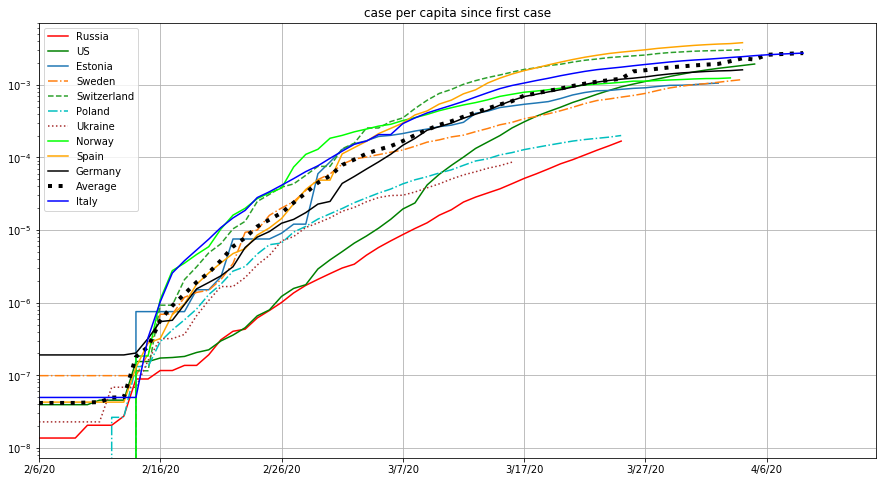

In [28]:
df_4 = df_per_capita_T
df_4['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='case per capita since first case')
df_4['US'].plot(c='g', legend="US", linestyle='solid')
df_4['Estonia'].plot(legend="Est")
df_4['Sweden'].plot(legend="Sw", linestyle='-.')
df_4['Switzerland'].plot(legend="S", linestyle='--')
df_4['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_4['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_4['Norway'].plot(c='lime',legend="Nor")
df_4['Spain'].plot(c='orange',legend="Spain", )
df_4['Germany'].plot(c='k',legend="Germany", )
df_4['Average'].plot(c='k',legend="Avg",lw=4, linestyle=':' )
df_4['Italy'].plot(c='b', legend="It", logy=True).grid()

In [29]:
df_d = df_death.copy()
df_d.iloc[0] = df_d.iloc[0].shift(-43)
df_d.iloc[1] = df_d.iloc[1].shift(-24)
df_d.iloc[2] = df_d.iloc[2].shift(-7)
df_d.iloc[3] = df_d.iloc[3].shift(-29)
df_d.iloc[4] = df_d.iloc[4].shift(-27)
df_d.iloc[5] = df_d.iloc[5].shift(-39)
df_d.iloc[6] = df_d.iloc[6].shift(-18)
df_d.iloc[7] = df_d.iloc[7].shift(-28)
df_d.iloc[8] = df_d.iloc[8].shift(-22)
df_d.iloc[9] = df_d.iloc[9].shift(-31)
df_d.iloc[10] = df_d.iloc[10].shift(-16)

avg_death = df_d.T.mean(numeric_only=True, axis=1)
# avg_death, type(avg_death)

df_death_T = df_d.T
df_death_T['average'] = avg_death
df_death = df_death_T.T

# df_death

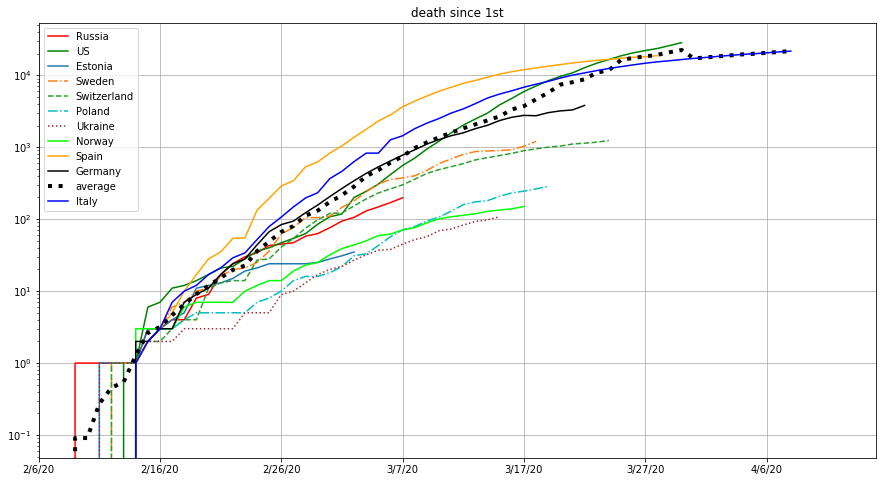

In [30]:
df_6 = df_death.T
df_6['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death since 1st', logy=True)
df_6['US'].plot(c='g', legend="US", )
df_6['Estonia'].plot(legend="Est")
df_6['Sweden'].plot(legend="Sw",linestyle='-.' )
df_6['Switzerland'].plot(legend="S", linestyle='--')
df_6['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_6['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_6['Norway'].plot(c='lime',legend="Nor")
df_6['Spain'].plot(c='orange',legend="Spain")
df_6['Germany'].plot(c='k',legend="Germany")
df_6['average'].plot(c='k',legend="Avg",lw=4, linestyle=':' )
df_6['Italy'].plot(c='b', legend="It").grid()

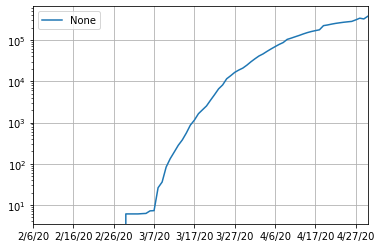

In [31]:
import numpy as np

for d in range(17, 31):
    avg_case[f'4/{d}/20']=np.nan
    avg_d_t_c[f'4/{d}/20']=np.nan
    
pred_case_rus = (avg_case.shift(23) * df_pop.iloc[5][0]).fillna(0)
# (df_4_['Russia']).shift(21).plot(c='r', figsize=(15, 8), legend="RU", title='case per capita',)
pred_case_rus.plot(logy=True, legend="pred").grid()

In [32]:
# df_death_T = df_d.T
# df_death_T['average'] = avg_death
# df_death = df_death_T.T

df_c_avg_T = df_c_avg.T
df_c_avg_T['Rus_pred'] = pred_case_rus.round().fillna(0)
df_c_avg = df_c_avg_T.T.fillna(0)
df_c_avg.tail(7)



,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,6343.0,7497.0,8672.0,10131.0,11917.0,13584.0,15770.0,18328.0,21102.0,24490.0
Spain,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,136675.0,141942.0,148220.0,153222.0,158273.0,163027.0,166831.0,170099.0,172541.0,177644.0
Sweden,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7206.0,7693.0,8419.0,9141.0,9685.0,10151.0,10483.0,10948.0,11445.0,11927.0
Switzerland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21657.0,22253.0,23280.0,24051.0,24551.0,25107.0,25415.0,25688.0,25936.0,26336.0
Ukraine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1319.0,1462.0,1668.0,1892.0,2203.0,2511.0,2777.0,3102.0,3372.0,3764.0
US,11.0,11.0,11.0,11.0,11.0,12.0,12.0,13.0,13.0,13.0,...,366667.0,396223.0,429052.0,461437.0,496535.0,526396.0,555313.0,580619.0,607670.0,636350.0
Rus_pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69101.0,78186.0,86786.0,103573.0,111284.0,120193.0,129493.0,140620.0,151347.0,160893.0


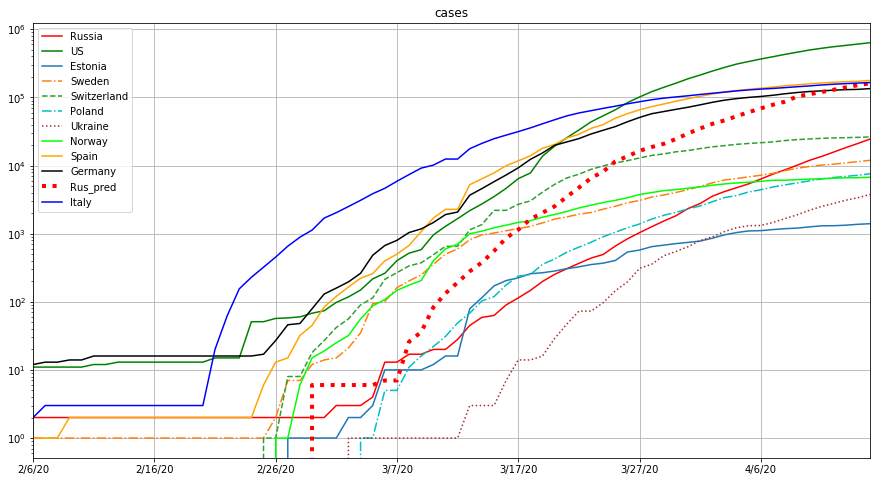

In [33]:
_df_4_ = df_c_avg.T
_df_4_['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='cases')
_df_4_['US'].plot(c='g', legend="US", linestyle='solid')
_df_4_['Estonia'].plot(legend="Est")
_df_4_['Sweden'].plot(legend="Sw", linestyle='-.')
_df_4_['Switzerland'].plot(legend="S", linestyle='--')
_df_4_['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
_df_4_['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
_df_4_['Norway'].plot(c='lime',legend="Nor")
_df_4_['Spain'].plot(c='orange',legend="Spain", )
_df_4_['Germany'].plot(c='k',legend="Germany", )
_df_4_['Rus_pred'].plot(c='r',legend="Avg",lw=4, linestyle=':', )
_df_4_['Italy'].plot(c='b', legend="It", logy=True).grid()

In [58]:
avg_d_t_c 
pred_d_to_c_rus = avg_d_t_c .shift(8).fillna(0)


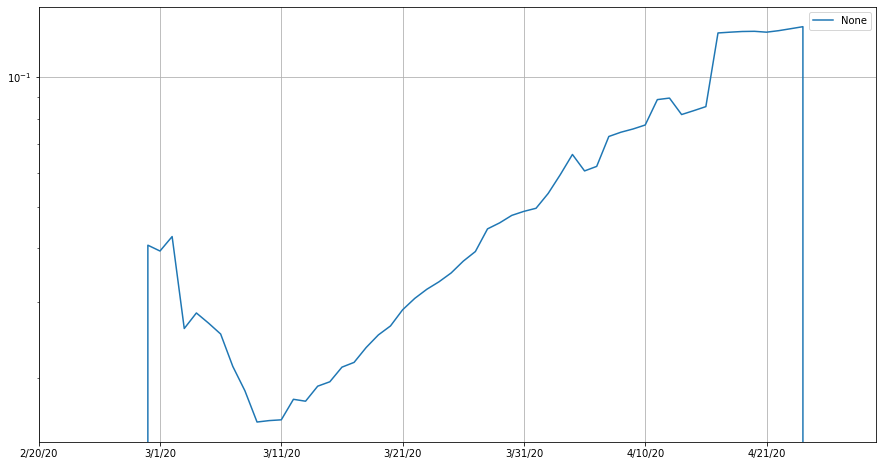

In [35]:
pred_d_to_c_rus.plot(logy=True, legend="pred", figsize=(15, 8)).grid()

In [36]:
for k in range(7, 21):
    pred_case_rus=pred_case_rus.drop(index=f'2/{k}/20')

In [37]:
pred_death_rus = [0]
for m in range(len(pred_d_to_c_rus)):
    pred_death_rus.append(pred_d_to_c_rus[m] * pred_case_rus[m])
    
pred_death_rus = pd.Series(pred_death_rus)

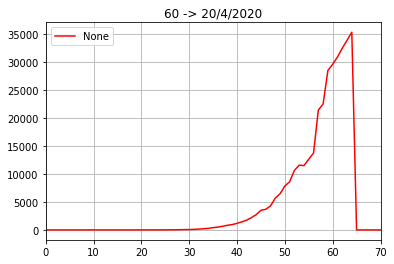

In [60]:
# labels = ['2/20/20', '3/1/20', '3/11/20', '3/21/20', '3/31/20', '4/10/20', '4/20/20', '4/30/20']
# loc = [0,10,20,30,40,50,60,70]
# xticks = {loc: labels}
pred_death_rus.plot(logy=False, c='r', legend="pred",title='60 -> 20/4/2020').grid()